In [1]:
import torch

Step1. 데이터 모으기

In [ ]:
N = 20
random0 = torch.randn(int(N/2), 1)
random5 = torch.randn(int(N/2), 1) + 5
class1_data = torch.hstack([random0, random5])
class2_data = torch.hstack([random5, random0])
class1_label = torch.ones(int(N/2), 1)
class2_label = torch.zeros(int(N/2), 1)
X = torch.vstack([class1_data, class2_data])
y = torch.vstack([class1_label, class2_label])

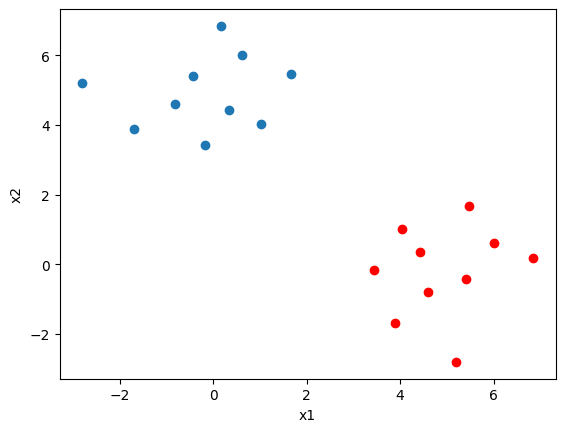

In [3]:
import matplotlib.pyplot as plt
plt.plot(class1_data[:,0], class1_data[:,1], 'o')
plt.plot(class2_data[:,0], class2_data[:,1], 'ro')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

Step2. 모델 만들기

In [33]:
from torch import nn

class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        
        # plain
        self.linear = nn.Sequential(nn.Linear(2, 100),
                                    nn.Sigmoid(),
                                    nn.Linear(100, 1),
                                    nn.Sigmoid())
        
        # # very simple
        # self.linear = nn.Sequential(nn.Linear(2, 1),
        #                         nn.Sigmoid())
        
        # # deep
        # self.linear = nn.Sequential(nn.Linear(2, 100),
        #                             nn.Sigmoid(),
        #                             nn.Linear(100, 100),
        #                             nn.Sigmoid(),
        #                             nn.Linear(100, 100),
        #                             nn.Sigmoid(),
        #                             nn.Linear(100, 1),
        #                             nn.Sigmoid())
    
    def forward(self, x):
        x = self.linear(x)
        return x

In [58]:
model = MLP()
print(model)
print(model(torch.randn(5, 2)).shape)

MLP(
  (linear): Sequential(
    (0): Linear(in_features=2, out_features=100, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=100, out_features=1, bias=True)
    (3): Sigmoid()
  )
)
torch.Size([5, 1])


Step3. 학습시키기

In [59]:
from torch import optim

LR = 1e-1

EPOCH = 100

optimizer = optim.Adam(model.parameters(), lr=LR)

criterion = nn.BCELoss()

loss_history = []

model.train() # train mode로 전환
for ep in range(EPOCH):
    # inference
    y_hat= model(X)
    
    # loss
    loss = criterion(y_hat, y)
    
    # update
    optimizer.zero_grad()
    loss.backward()
    optimizer.step() 
    
    # print loss
    loss_history += [loss.item()]
    print(f'Epoch: {ep +1}, train loss: {loss.item():.4f}')
    print('-' * 20)    

Epoch: 1, train loss: 0.5917
--------------------
Epoch: 2, train loss: 0.1158
--------------------
Epoch: 3, train loss: 0.0140
--------------------
Epoch: 4, train loss: 0.0050
--------------------
Epoch: 5, train loss: 0.0020
--------------------
Epoch: 6, train loss: 0.0008
--------------------
Epoch: 7, train loss: 0.0004
--------------------
Epoch: 8, train loss: 0.0002
--------------------
Epoch: 9, train loss: 0.0001
--------------------
Epoch: 10, train loss: 0.0000
--------------------
Epoch: 11, train loss: 0.0000
--------------------
Epoch: 12, train loss: 0.0000
--------------------
Epoch: 13, train loss: 0.0000
--------------------
Epoch: 14, train loss: 0.0000
--------------------
Epoch: 15, train loss: 0.0000
--------------------
Epoch: 16, train loss: 0.0000
--------------------
Epoch: 17, train loss: 0.0000
--------------------
Epoch: 18, train loss: 0.0000
--------------------
Epoch: 19, train loss: 0.0000
--------------------
Epoch: 20, train loss: 0.0000
----------

In [60]:
print(criterion(y_hat, y))
print(torch.sum(-torch.log(y_hat ** y * (1-y_hat) ** (1-y)))/N)
print(criterion(torch.tensor([0.]), torch.tensor([1.]))) # 100이 최대값임

tensor(7.3971e-08, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(7.7486e-08, grad_fn=<DivBackward0>)
tensor(100.)


Text(0, 0.5, 'Loss')

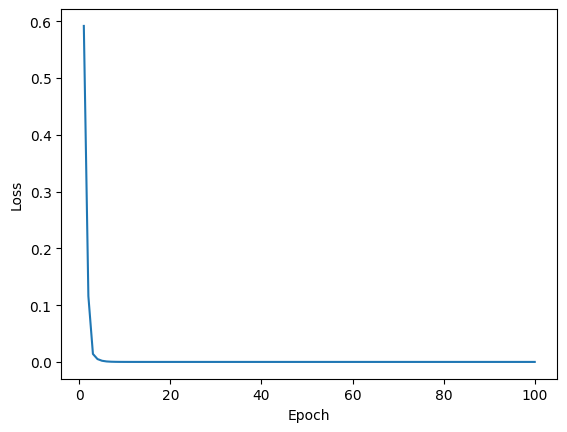

In [61]:
plt.plot(range(1, EPOCH+1), loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')

Step4. 모델 테스트하기

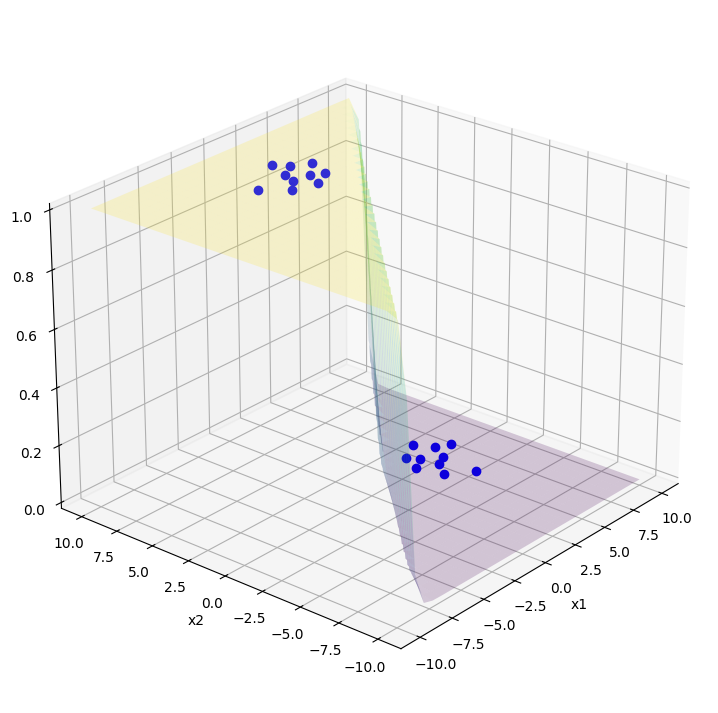

In [68]:
X1_test = torch.linspace(-10, 10, 30)
X2_test = torch.linspace(-10, 10, 30)
X1_test, X2_test = torch.meshgrid(X1_test, X2_test)
X_test = torch.cat([X1_test.unsqueeze(dim=2), X2_test.unsqueeze(dim=2)], dim=2)

model.eval() # 1. test mode로 전환
with torch.no_grad(): # 2.
    y_hat = model(X_test)
    
# 1. dropout 혹은 BN 같은거 사용했다면 train mode와 test mode의 동작이 다르므로 eval()로 모드를 바꿔줘야한다.
# 2. grad_fn 계산 <- 메모리가 불필요하게 사용됨

Y_hat = y_hat.squeeze()

plt.figure(figsize=[10, 9])
ax = plt.axes(projection='3d')
ax.view_init(elev=25, azim=-140)

ax.plot_surface(X1_test, X2_test, Y_hat.numpy(), cmap='viridis', alpha=0.2)
plt.plot(class1_data[:,0], class1_data[:,1], class1_label.squeeze(), 'bo')
plt.plot(class2_data[:,0], class2_data[:,1], class2_label.squeeze(), 'bo')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()